In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/monunmon.csv")

# 특징(X)과 레이블(y) 분리
X = data.iloc[:, :-1]  # 특징 (feature)들
y = data.iloc[:, -1]   # 레이블 (0~94)

**튜닝을 하지 않은 기본 decision tree model**

In [3]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# F1 Score 계산
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted'는 클래스 불균형을 고려한 평균을 계산
print(f"F1 Score (Weighted): {f1:.4f}")

# Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6120
F1 Score (Weighted): 0.6127

Classification Report:
              precision    recall  f1-score   support

          -1       0.53      0.56      0.54       590
           0       0.49      0.60      0.54        30
           1       0.62      0.55      0.58        44
           2       0.65      0.68      0.67        41
           3       0.45      0.52      0.48        33
           4       0.65      0.69      0.67        32
           5       0.76      0.70      0.73        37
           6       0.82      0.87      0.85        38
           7       0.65      0.57      0.61        35
           8       0.57      0.61      0.59        33
           9       0.46      0.65      0.54        26
          10       0.68      0.60      0.64        43
          11       0.56      0.67      0.61        45
          12       0.74      0.80      0.77        44
          13       0.28      0.39      0.33        46
          14       0.56      0.73      0.64        37
          1

**튜닝을 진행한 decision tree model**

Fitting 5 folds for each of 72 candidates, totalling 360 fits
최적의 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy: 0.6173
F1 Score (Weighted): 0.6176

Classification Report:
              precision    recall  f1-score   support

          -1       0.50      0.47      0.49       590
           0       0.38      0.40      0.39        30
           1       0.48      0.45      0.47        44
           2       0.81      0.73      0.77        41
           3       0.49      0.55      0.51        33
           4       0.50      0.66      0.57        32
           5       0.64      0.81      0.71        37
           6       0.72      0.82      0.77        38
           7       0.69      0.57      0.62        35
           8       0.61      0.67      0.64        33
           9       0.37      0.50      0.43        26
          10       0.60      0.63      0.61        43
          11       0.78      0.62      0.69        45
         

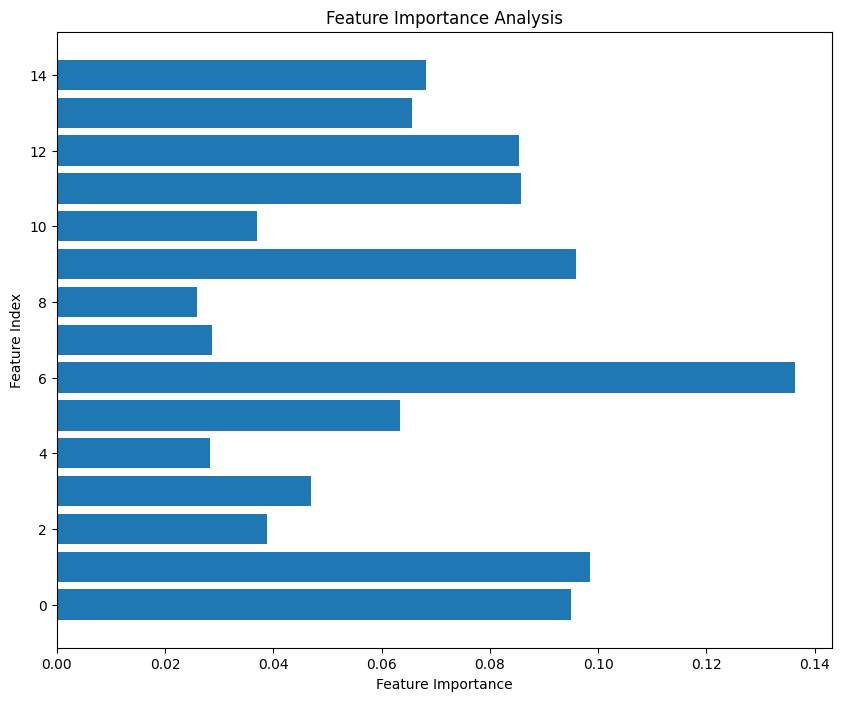

In [4]:
#라이브러리 임포트
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV를 통한 최적의 파라미터 탐색
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 튜닝한 모델로 학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = best_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# F1 Score 계산
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted'는 클래스 불균형을 고려한 평균을 계산
print(f"F1 Score (Weighted): {f1:.4f}")

# 분류 보고서
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 14. Feature Importance 시각화
feature_importances = best_model.feature_importances_
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance Analysis')
plt.show()